# Machine Learning Model for Stress Detection

This notebook trains and evaluates baseline machine learning models to classify stress and rest states using extracted EDA features. Model performance is evaluated using accuracy, classification reports, and confusion matrices.

In [1]:
# basic libraries
import pandas as pd
import numpy as np

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
# change this subject name if your file is different
subject = "S01"

# read features csv created in 03_features.ipynb
file_name = f"features_{subject}.csv"
df = pd.read_csv(file_name)

print("Loaded file:", file_name)
print("Total rows (windows):", len(df))
df.head()


Loaded file: features_S01.csv
Total rows (windows): 89


,subject,label,window_start,window_end,eda_mean,eda_std
0,S01,rest,2013-02-20 18:01:30+00:00,2013-02-20 18:02:00+00:00,0.492917,0.009664
1,S01,rest,2013-02-20 18:01:45+00:00,2013-02-20 18:02:15+00:00,0.500637,0.006211
2,S01,rest,2013-02-20 18:02:00+00:00,2013-02-20 18:02:30+00:00,0.511497,0.014188
3,S01,rest,2013-02-20 18:02:15+00:00,2013-02-20 18:02:45+00:00,0.535863,0.016988
4,S01,rest,2013-02-20 18:02:30+00:00,2013-02-20 18:03:00+00:00,0.543188,0.010099


In [3]:
# X = input features (numbers)
X = df[["eda_mean", "eda_std"]]

# y = labels (rest/stress)
y = df["label"]

print("Labels count:")
print(y.value_counts())


Labels count:
label
stress    59
rest      30
Name: count, dtype: int64


In [4]:
# convert text labels to numbers
# rest -> 0, stress -> 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label mapping:")
for name, num in zip(le.classes_, range(len(le.classes_))):
    print(name, "->", num)


Label mapping:
rest -> 0
stress -> 1


In [5]:
# split data into train and test
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 71
Test size: 18


In [9]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# features and labels
X = df[["eda_mean", "eda_std"]]
y = df["label"]

# encode labels: rest=0, stress=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Logistic Regression with balanced classes
lr = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"   # IMPORTANT FIX
)

# train model
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_,
    zero_division=0   # IMPORTANT FIX (removes red warning)
))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Label mapping: {'rest': 0, 'stress': 1}
Logistic Regression Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

        rest       0.60      1.00      0.75         6
      stress       1.00      0.67      0.80        12

    accuracy                           0.78        18
   macro avg       0.80      0.83      0.78        18
weighted avg       0.87      0.78      0.78        18

Confusion Matrix:
[[6 0]
 [4 8]]


In [13]:
# random forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# train
rf.fit(X_train, y_train)

# predict
y_pred_rf = rf.predict(X_test)

# results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

        rest       0.75      0.50      0.60         6
      stress       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18

Confusion Matrix:
[[ 3  3]
 [ 1 11]]


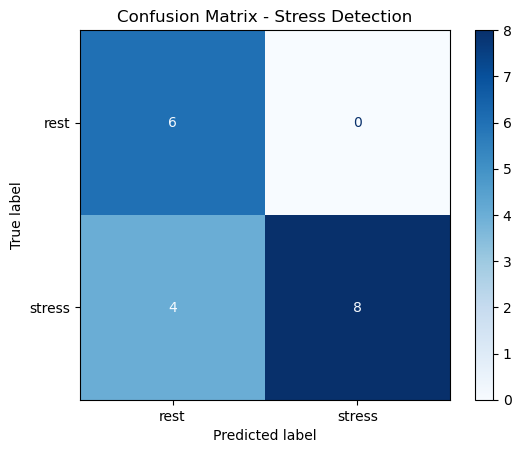

In [14]:
# Visual confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=["rest", "stress"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Stress Detection")
plt.show()


In [12]:
# Conclusion 
acc_lr = accuracy_score(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Summary:")
print("Logistic Regression accuracy =", round(acc_lr, 3))
print("Random Forest accuracy =", round(acc_rf, 3))

if acc_rf > acc_lr:
    print("Random Forest performed better for this subject.")
else:
    print("Logistic Regression performed better for this subject.")


Summary:
Logistic Regression accuracy = 0.778
Random Forest accuracy = 0.778
Logistic Regression performed better for this subject.
